In [2]:
import numpy as np
import pandas as pd 
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)

#### Data collection 

In [4]:
df1=pd.read_csv('CEDP Jira 2021-01-01--2021-03-24.csv')
df2=pd.read_csv('CEDP Jira 2021-03-25--2021-05-31.csv')
df3=pd.read_csv('CEDP Jira 2021-06-01--2021-08-15.csv')
df4=pd.read_csv('CEDP Jira 2021-08-16--2021-10-25.csv')
df5=pd.read_csv('CEDP Jira 2021-10-26--2021-12-31.csv')


print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(985, 326)
(1000, 338)
(963, 363)
(963, 309)
(785, 309)


#### Data pre processing 

In [5]:
cols_required=['Summary','Created']
df1=df1[cols_required]
df2=df2[cols_required]
df3=df3[cols_required]
df4=df4[cols_required]
df5=df5[cols_required]

print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

df1.head()

(985, 2)
(1000, 2)
(963, 2)
(963, 2)
(785, 2)


,Summary,Created
0,Cirrus CDO prod and test DataStage needs valid...,23/Mar/21 11:27 PM
1,New project on Cirrus for mna-contract-harvesting,23/Mar/21 10:20 PM
2,Unable to run SQL in C360 SQL Query Prod,23/Mar/21 9:13 PM
3,Blue Fringe Setup for ECI Staging Cluster,23/Mar/21 8:08 PM
4,Unable to connect to cedp authorization failed...,23/Mar/21 7:39 PM


In [6]:
df_crtTckt=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
print('Shape of dataframe : ',df_crtTckt.shape)
df_crtTckt.head()

Shape of dataframe :  (4696, 2)


,Summary,Created
0,Cirrus CDO prod and test DataStage needs valid...,23/Mar/21 11:27 PM
1,New project on Cirrus for mna-contract-harvesting,23/Mar/21 10:20 PM
2,Unable to run SQL in C360 SQL Query Prod,23/Mar/21 9:13 PM
3,Blue Fringe Setup for ECI Staging Cluster,23/Mar/21 8:08 PM
4,Unable to connect to cedp authorization failed...,23/Mar/21 7:39 PM


In [7]:
df_crtTckt.Created.dtype

dtype('O')

In [8]:
# Making created date to pandas datetime type 
df_crtTckt.Created=pd.to_datetime(df_crtTckt.Created)
df_crtTckt.Created.dtype

dtype('<M8[ns]')

In [9]:
# Having a column that contain only date of ticket creation
df_crtTckt['Day_created']=pd.Series([])

for i in range(df_crtTckt.shape[0]):
    df_crtTckt.Day_created[i]=df_crtTckt.Created[i].date()

df_crtTckt.head()

C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_4208/3487484278.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_crtTckt['Day_created']=pd.Series([])
C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_4208/3487484278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crtTckt.Day_created[i]=df_crtTckt.Created[i].date()


,Summary,Created,Day_created
0,Cirrus CDO prod and test DataStage needs valid...,2021-03-23 23:27:00,2021-03-23
1,New project on Cirrus for mna-contract-harvesting,2021-03-23 22:20:00,2021-03-23
2,Unable to run SQL in C360 SQL Query Prod,2021-03-23 21:13:00,2021-03-23
3,Blue Fringe Setup for ECI Staging Cluster,2021-03-23 20:08:00,2021-03-23
4,Unable to connect to cedp authorization failed...,2021-03-23 19:39:00,2021-03-23


In [10]:
# Getting a dataframe with created date as index and corresponding count of ticket created on that date 

df_crtTckt_count=df_crtTckt.groupby(by=['Day_created']).count()
df_crtTckt_count.rename(columns={'Summary':'Count_created_ticket'},inplace=True)
df_crtTckt_count=pd.DataFrame(df_crtTckt_count['Count_created_ticket'])
df_crtTckt_count=df_crtTckt_count[df_crtTckt_count>5].dropna()
df_crtTckt_count.head()

,Count_created_ticket
Day_created,
2021-01-04,16.0
2021-01-05,17.0
2021-01-06,19.0
2021-01-07,9.0
2021-01-08,13.0


In [11]:
df_crtTckt_count.index=pd.to_datetime(df_crtTckt_count.index)

In [12]:
# Description of time series data 
df_crtTckt_count.Count_created_ticket.describe()

count    250.000000
mean      18.248000
std        5.706554
min        6.000000
25%       14.000000
50%       18.000000
75%       23.000000
max       34.000000
Name: Count_created_ticket, dtype: float64

#### Visualization of Time series data - count of created ticket

[]

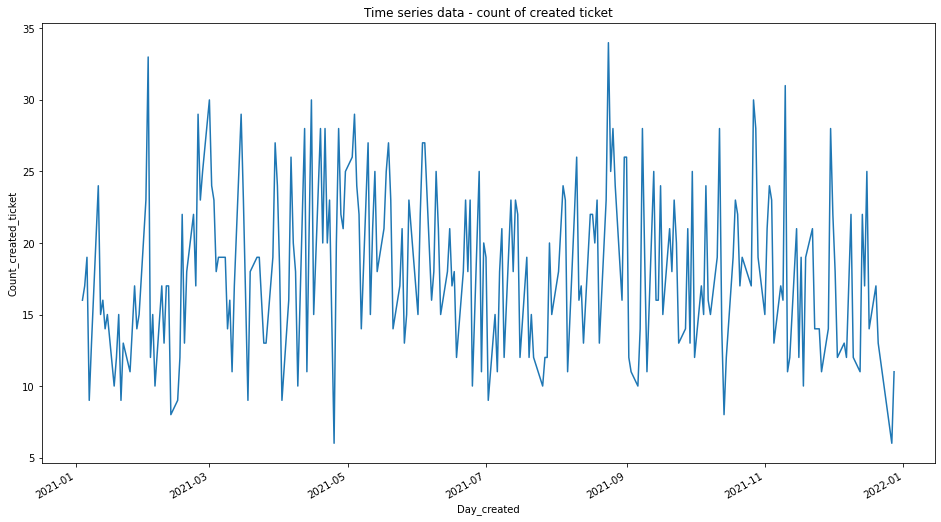

In [13]:
# Plot of Time series data - count of created ticket
df_crtTckt_count.Count_created_ticket.plot(figsize=(16,9))
plt.title('Time series data - count of created ticket')
plt.ylabel('Count_created_ticket')
plt.plot()

[]

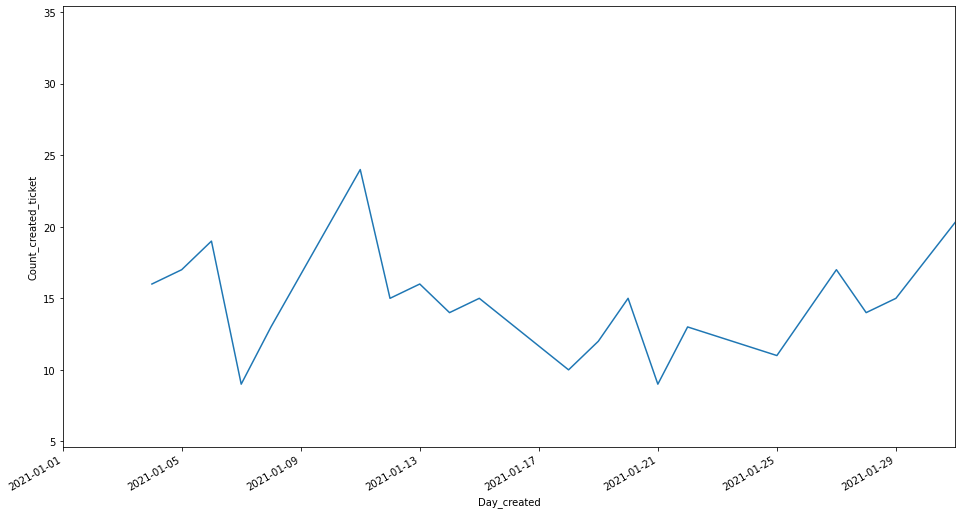

In [14]:
# Showing count of created ticket in one month 
df_crtTckt_count.Count_created_ticket.plot(xlim=['2021-01-01','2021-01-31'],figsize=(16,9))
plt.ylabel('Count_created_ticket')
plt.plot()

[]

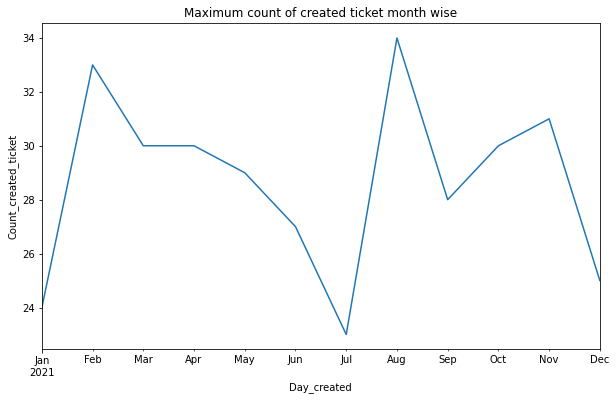

In [15]:
# Maximum count of created ticket month wise 
df_crtTckt_count['Count_created_ticket'].resample(rule='M').max().plot(figsize=(10,6))
plt.title('Maximum count of created ticket month wise')
plt.ylabel('Count_created_ticket')
plt.plot()

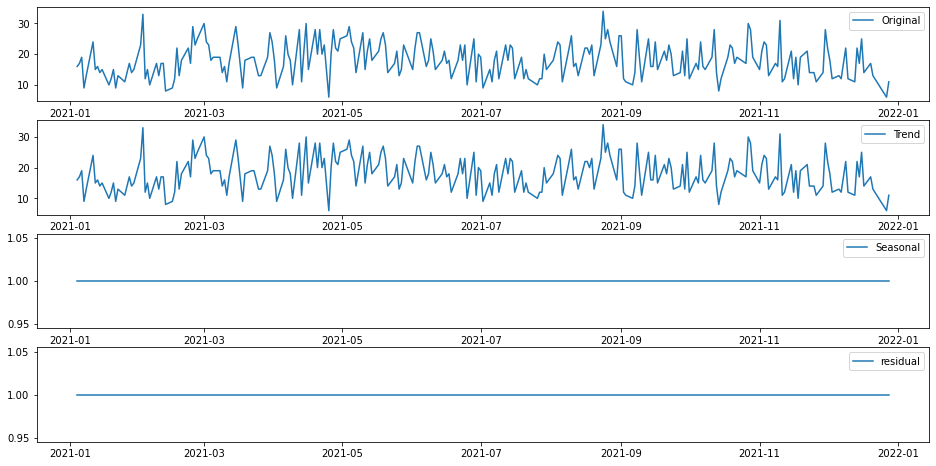

In [16]:
# showing trend, seasonal and other components in data separately 

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df_crtTckt_count['Count_created_ticket'],period=1,model='multiplicative')

trend=decomposition.trend 
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(16,8))
fig=plt.figure(1)

plt.subplot(4,1,1)
plt.plot(df_crtTckt_count['Count_created_ticket'],label='Original')
plt.legend(loc='best')
plt.subplot(4,1,2)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(4,1,3)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(4,1,4)
plt.plot(residual,label='residual')
plt.legend(loc='best')

In [17]:
#decomposition1=seasonal_decompose(df_crtTckt_count['Count_created_ticket'],period=1,model='multiplicative')
#plt.figure(figsize=(16,9))
#decomposition1.plot()

So, no Seasonality there in timeseries data 

###### Checking stationary of data

Moving average 

In [18]:
# Having a new column contaning moving average with window size 5
df_crtTckt_count['count_day5_roll_ma']=df_crtTckt_count['Count_created_ticket'].rolling(window=5,min_periods=1).mean()

# Having a new column contaning standard daviation with window size 5 
df_crtTckt_count['count_day5_roll_std']=df_crtTckt_count['Count_created_ticket'].rolling(window=5,min_periods=1).std()

df_crtTckt_count.head()

,Count_created_ticket,count_day5_roll_ma,count_day5_roll_std
Day_created,,,
2021-01-04,16.0,16.000000,NaN
2021-01-05,17.0,16.500000,0.707107
2021-01-06,19.0,17.333333,1.527525
2021-01-07,9.0,15.250000,4.349329
2021-01-08,13.0,14.800000,3.898718


[]

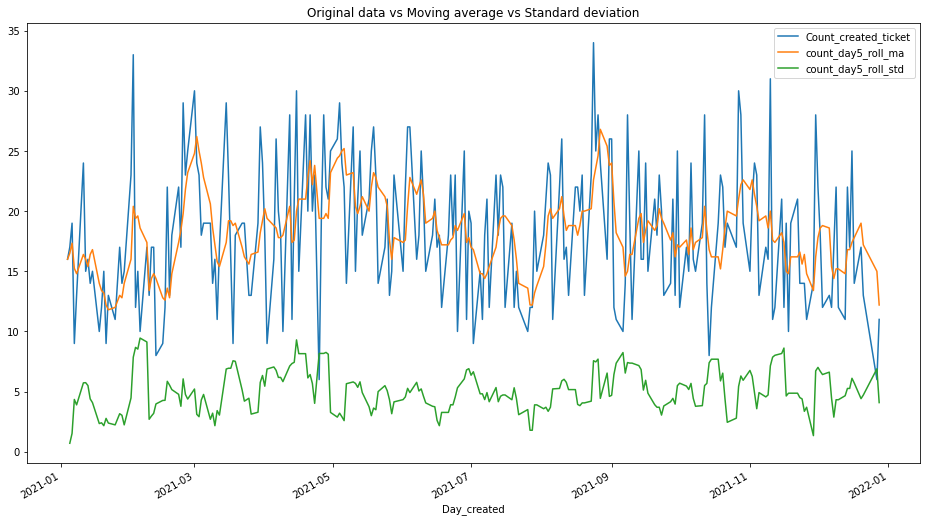

In [19]:
# Plotting original data, moving average and standard deviation 
df_crtTckt_count[['Count_created_ticket','count_day5_roll_ma','count_day5_roll_std']].plot(figsize=(16,9))
plt.title('Original data vs Moving average vs Standard deviation')
plt.plot()

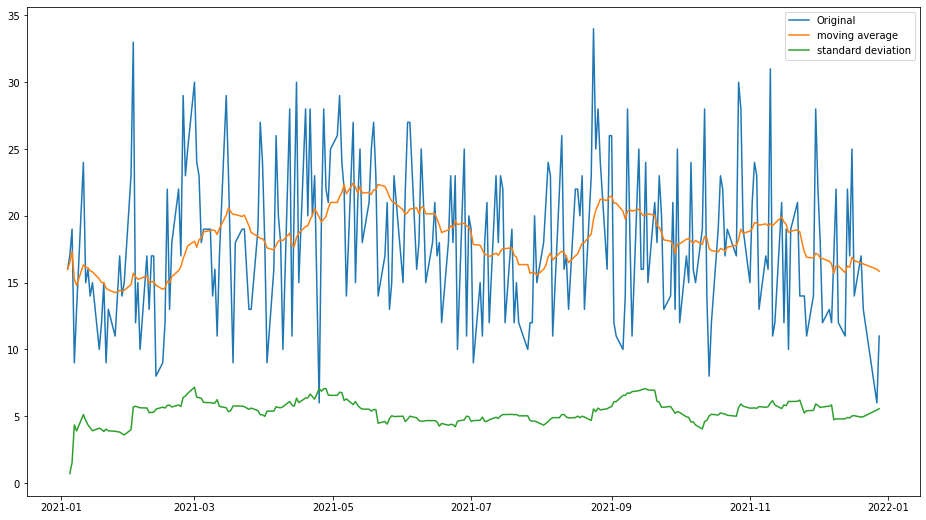

In [20]:
# Showing moving average, standard deviation with different window size 

plt.figure(figsize=(16,9))
plt.plot(df_crtTckt_count['Count_created_ticket'],label='Original')
count_day_roll_ma=df_crtTckt_count['Count_created_ticket'].rolling(window=20,min_periods=1).mean()
plt.plot(count_day_roll_ma,label='moving average')
count_day_roll_std=df_crtTckt_count['Count_created_ticket'].rolling(window=20,min_periods=1).std()
plt.plot(count_day_roll_std,label='standard deviation')
plt.legend(loc='best')

So. mean and standard deviation value not constant over time, so data not stationary

Applying Exponential weighted moving average 

<AxesSubplot:xlabel='Day_created'>

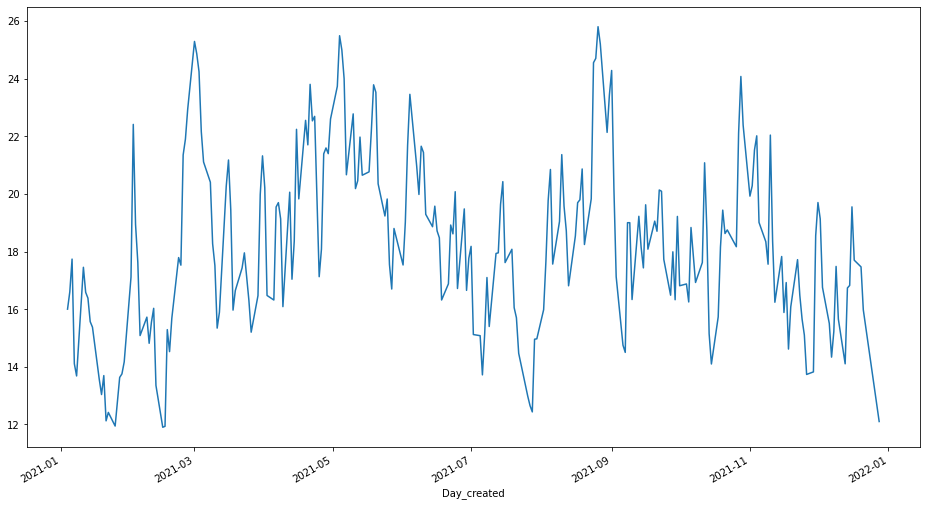

In [21]:
df_crtTckt_count['Count_created_ticket'].ewm(span=5).mean().plot(figsize=(16,9))

<AxesSubplot:xlabel='Day_created'>

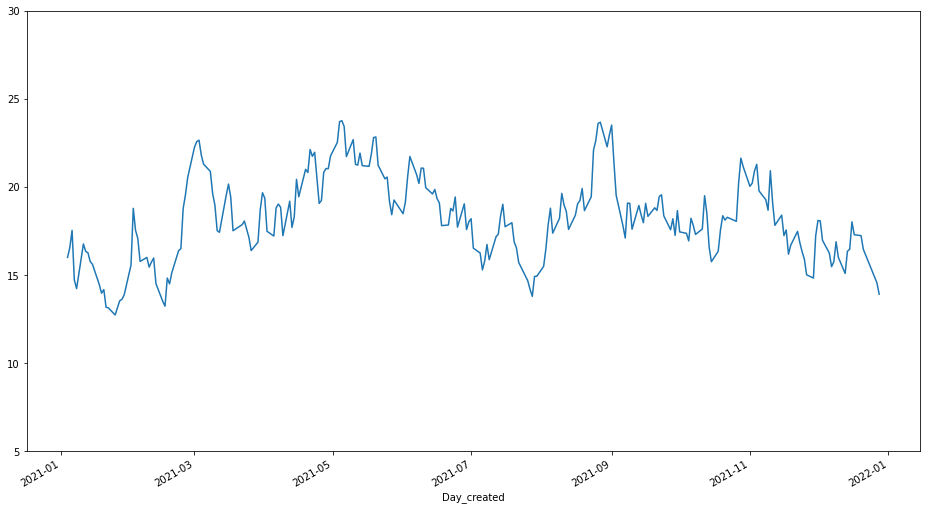

In [22]:
df_crtTckt_count['Count_created_ticket'].ewm(span=10).mean().plot(figsize=(16,9),ylim=(5,30))

<AxesSubplot:xlabel='Day_created'>

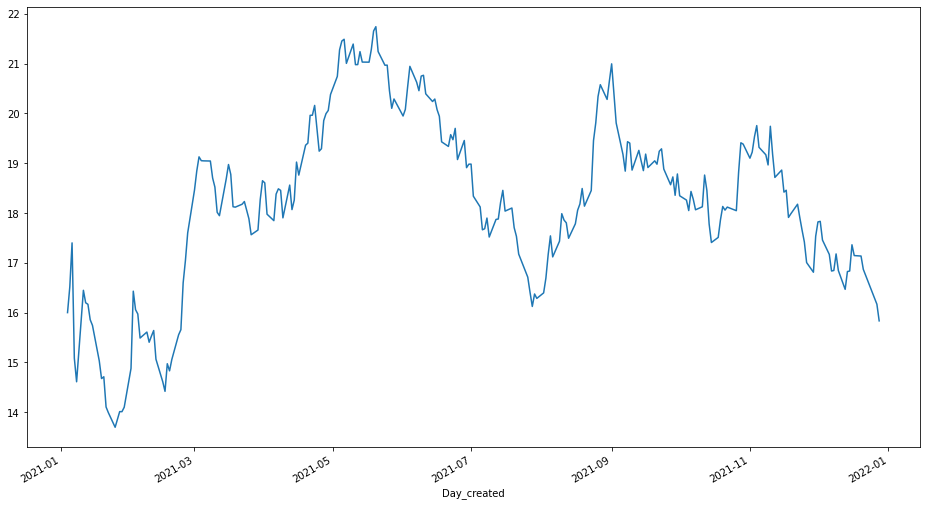

In [23]:
df_crtTckt_count['Count_created_ticket'].ewm(span=30).mean().plot(figsize=(16,9))

[]

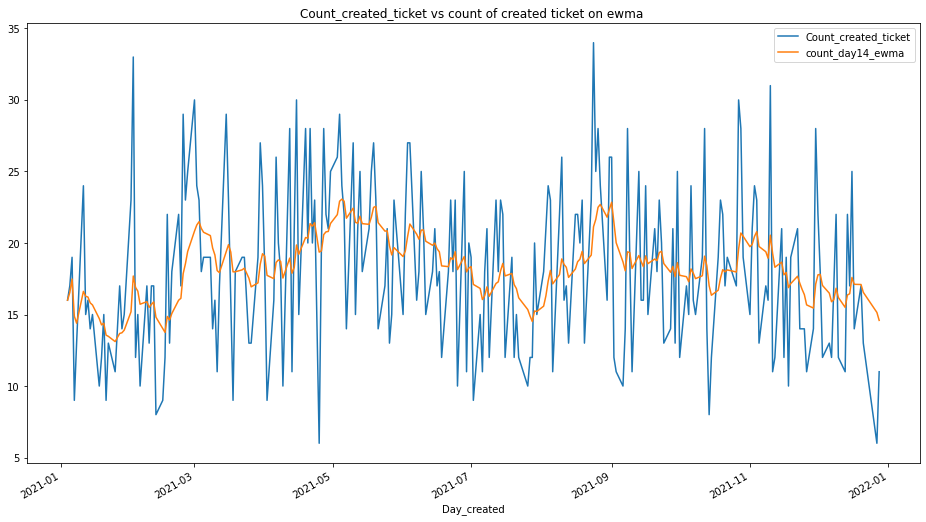

In [24]:
# Having exponential weighted moving average 
df_crtTckt_count['count_day14_ewma']=df_crtTckt_count['Count_created_ticket'].ewm(span=14).mean()
df_crtTckt_count[['Count_created_ticket','count_day14_ewma']].plot(figsize=(16,9))
plt.title('Count_created_ticket vs count of created ticket on ewma ')
plt.plot()

Cross validation of stationary by Augmented Dicky-Fuller test 

In [25]:
# Data's stationary check by Augmented Dicky-Fuller test
from statsmodels.tsa.stattools import adfuller
result_adfuller=adfuller(df_crtTckt_count['Count_created_ticket'])
Adf_statistic,p_val=result_adfuller[0],result_adfuller[1]
print(Adf_statistic)
print(p_val)

-3.4201700264710193
0.010290195964160503


So,p value is less than 0.05, so null hypothesis can be rejected. So, time series is stationary 

In [26]:
# Differenctiation 
#df_crtTckt_count['Count__tkt_1stDifference']=df_crtTckt_count['Count_created_ticket']-df_crtTckt_count['Count_created_ticket'].shift(1)
#df_crtTckt_count.head()

In [27]:
#result2_adfuller=adfuller(df_crtTckt_count['Count__tkt_1stDifference'].dropna())
#result2_adfuller

In [28]:
#df_crtTckt_count['Count__tkt_1stDifference'].dropna().plot(figsize=(16,9))

In [29]:
# Differenctiation with 5 as seasonality there
#df_crtTckt_count['Count__tkt_5Difference']=df_crtTckt_count['Count_created_ticket']-df_crtTckt_count['Count_created_ticket'].shift(5)
#df_crtTckt_count.head()

In [30]:
#df_crtTckt_count['Count_created_ticket'].diff()

In [31]:
#result5_adfuller=adfuller(df_crtTckt_count['Count__tkt_5Difference'].dropna())
#result5_adfuller

 Getting p, q order 

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

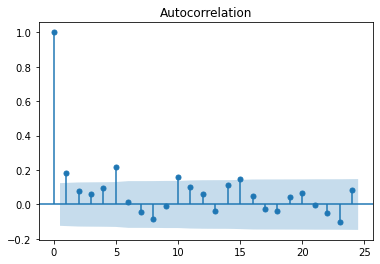

In [33]:
# ACF plot
acf=plot_acf(df_crtTckt_count['Count_created_ticket'])

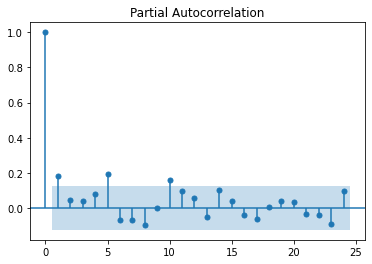

In [34]:
# PACF plot
pacf=plot_pacf(df_crtTckt_count['Count_created_ticket'])

In [35]:
#acf5=plot_acf(df_crtTckt_count['Count__tkt_5Difference'].dropna())

In [36]:
#pacf5=plot_pacf(df_crtTckt_count['Count__tkt_5Difference'].dropna())

In [37]:
# Splitting data for train and test 
train_data_date_end=dt.datetime(2021,11,30)
test_data_date_end=dt.datetime(2021,12,20)
train_data=df_crtTckt_count[:train_data_date_end]
test_data=df_crtTckt_count[train_data_date_end+timedelta(days=1):test_data_date_end]

In [38]:
train_data.head(2)

,Count_created_ticket,count_day5_roll_ma,count_day5_roll_std,count_day14_ewma
Day_created,,,,
2021-01-04,16.0,16.0,NaN,16.000000
2021-01-05,17.0,16.5,0.707107,16.535714


In [39]:
train_data.tail(2)

,Count_created_ticket,count_day5_roll_ma,count_day5_roll_std,count_day14_ewma
Day_created,,,,
2021-11-29,14.0,13.4,1.341641,15.449478
2021-11-30,28.0,16.2,6.723095,17.122881


In [40]:
test_data.head(2)

,Count_created_ticket,count_day5_roll_ma,count_day5_roll_std,count_day14_ewma
Day_created,,,,
2021-12-01,22.0,17.8,7.014271,17.773163
2021-12-02,18.0,18.6,6.693280,17.803408


In [41]:
test_data.tail(2)

,Count_created_ticket,count_day5_roll_ma,count_day5_roll_std,count_day14_ewma
Day_created,,,,
2021-12-17,14.0,17.8,5.718391,17.111396
2021-12-20,17.0,19.0,4.415880,17.096543


#### ARIMA Model 

In [42]:
# Building , training ARIMA model 
from statsmodels.tsa.arima_model import ARIMA
model_arima=ARIMA(train_data['Count_created_ticket'],order=(5,0,2))
model_arima_fit=model_arima.fit()
model_arima_fit.summary()

C:\Users\KrishnenduGhorui\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\KrishnenduGhorui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has n

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                               
================================================================================
Dep. Variable:     Count_created_ticket   No. Observations:                  233
Model:                       ARMA(5, 2)   Log Likelihood                -721.421
Method:                         css-mle   S.D. of innovations              5.338
Date:                  Mon, 23 May 2022   AIC                           1460.841
Time:                          22:51:56   BIC                           1491.901
Sample:                               0   HQIC                          1473.366
                                                                                
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         18.4287      0.560     32.920      0.000      17.331      19.526
ar.L1.Count_created_ticket     0.6327      0.082      7.760      0.000       0.473       0.792
ar.L2.Count_created_ticket    -0.8564      0.103     -8.325      0.000      -1.058      -0.655
ar.L3.Count_created_ticket     0.1476      0.096      1.543      0.123      -0.040       0.335
ar.L4.Count_created_ticket     0.0521      0.080      0.648      0.517      -0.105       0.210
ar.L5.Count_created_ticket     0.1658      0.070      2.359      0.018       0.028       0.304
ma.L1.Count_created_ticket    -0.5093      0.052     -9.857      0.000      -0.611      -0.408
ma.L2.Count_created_ticket     0.8910      0.074     12.010      0.000       0.746       1.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2916           -0.9714j            1.0142           -0.2036
AR.2            0.2916           +0.9714j            1.0142            0.2036
AR.3            1.4890           -0.0000j            1.4890           -0.0000
AR.4           -1.1932           -1.5857j            1.9845           -0.3527
AR.5           -1.1932           +1.5857j            1.9845            0.3527
MA.1            0.2858           -1.0201j            1.0594           -0.2065
MA.2            0.2858           +1.0201j            1.0594            0.2065
-----------------------------------------------------------------------------
"""

In [43]:
#pred_start_date=test_data.index[0]
#pred_end_date=test_data.index[-1]
#print(pred_start_date)
#print(pred_end_date)

##### Forcast /prediction through ARIMA model

In [44]:
# Predict values 
pred_vals=model_arima_fit.fittedvalues
pred_vals

Day_created
2021-01-04    18.428652
2021-01-05    18.021739
2021-01-06    18.092409
2021-01-07    18.340445
2021-01-08    16.769304
                ...    
2021-11-24    21.247208
2021-11-25    16.837052
2021-11-26    13.981883
2021-11-29    16.054127
2021-11-30    18.759158
Length: 233, dtype: float64

[]

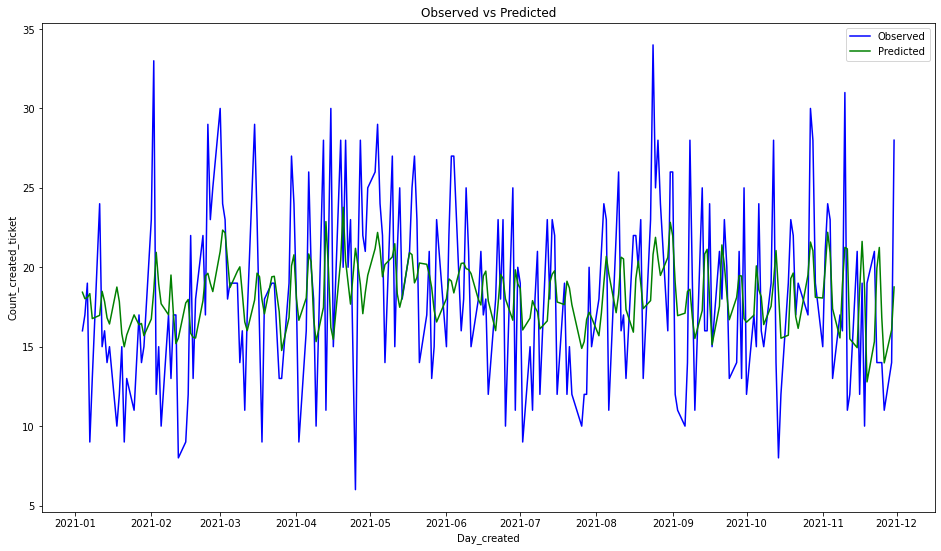

In [45]:
plt.figure(figsize=(16,9))
sns.lineplot(x=train_data.index,y=train_data['Count_created_ticket'],color='b',label='Observed')
plt.legend(loc='best')
sns.lineplot(x=pred_vals.index,y=pred_vals,color='g',label='Predicted')
plt.legend(loc='best')
plt.title('Observed vs Predicted')
plt.plot()

[]

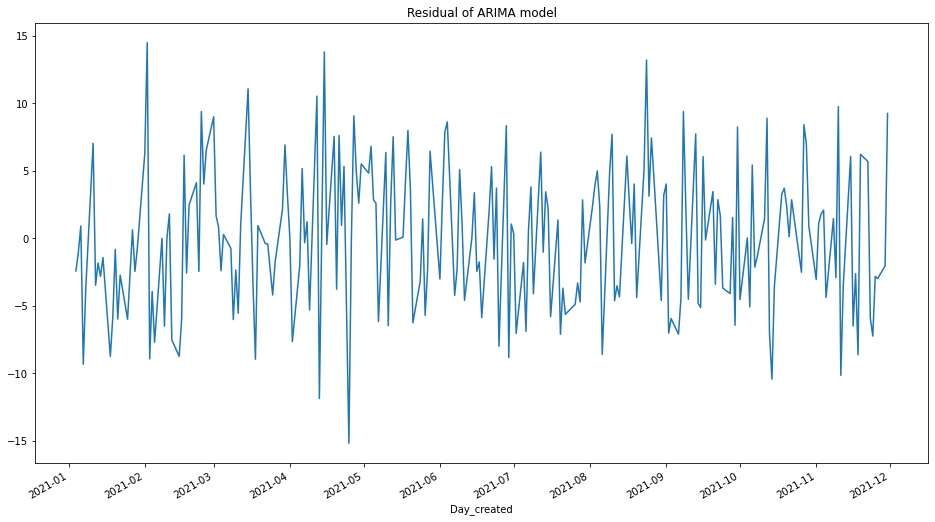

In [46]:
residual=model_arima_fit.resid
residual.plot(figsize=(16,9))
plt.title('Residual of ARIMA model')
plt.plot()

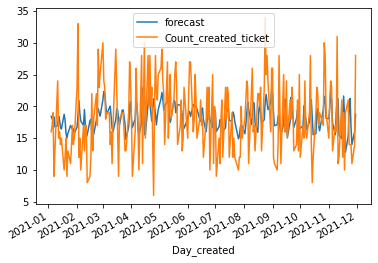

<Figure size 1152x648 with 0 Axes>

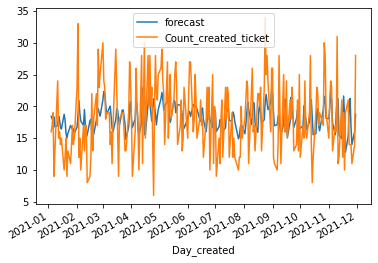

In [47]:
plt.figure(figsize=(16,9))
model_arima_fit.plot_predict(dynamic=False)

[]

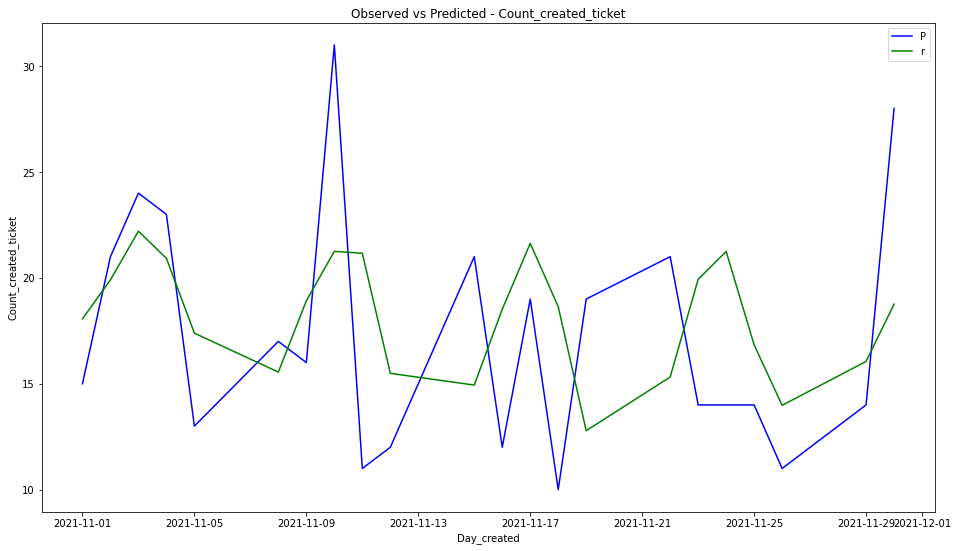

In [48]:
# Prediction , visualization for one month 
pred_arima_nov=model_arima_fit.predict(start=dt.datetime(2021,11,1),end=dt.datetime(2021,11,30))

plt.figure(figsize=(16,9))
sns.lineplot(x=pred_arima_nov.index,y=train_data['Count_created_ticket']['2021-11-01':'2021-11-30'],color='b')
plt.legend('Observed')
sns.lineplot(x=pred_arima_nov.index,y=pred_arima_nov,color='g')
plt.legend('Predicted')
plt.title('Observed vs Predicted - Count_created_ticket')
plt.ylabel('Count_created_ticket')
plt.plot()

###### Evaluation 

In [49]:
rmse=np.sqrt((sum((train_data['Count_created_ticket']-pred_vals)**2))/train_data['Count_created_ticket'].shape[0])
mae=sum(abs(train_data['Count_created_ticket']-pred_vals))/train_data['Count_created_ticket'].shape[0]
print('rmse - ', rmse)
print('mae - ',mae)

rmse -  5.3486248648216215
mae -  4.428695658743891


###### Auto arima to find best p,d,q value 

In [50]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel=pm.auto_arima(timeseries,start_p=0,start_q=0,max_p=10,max_q=10,test='adf',seasonal=True,trace=True)
    return automodel

In [52]:
arimamodel(train_data['Count_created_ticket'])

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1476.018, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1471.421, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1472.052, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2042.779, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1472.902, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1470.528, Time=0.88 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1472.315, Time=0.85 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1472.117, Time=0.86 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1473.290, Time=0.24 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1470.506, Time=1.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1465.227, Time=1.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1473.617, Time=1.02 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=1462.049, Time=1.11 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=1473.819, Time=1.20 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept

ARIMA(order=(5, 0, 2), scoring_args={}, suppress_warnings=True)

##### Forcasting out of training sample 

C:\Users\KrishnenduGhorui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\KrishnenduGhorui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


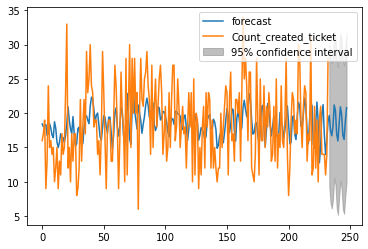

<Figure size 2304x648 with 0 Axes>

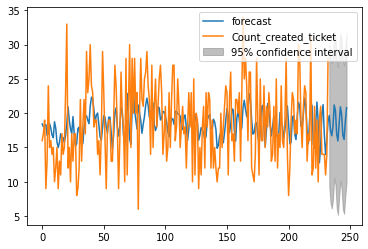

In [53]:
plt.figure(figsize=(32,9))
model_arima_fit.plot_predict(train_data.index[0],247)

In [54]:
model_arima_fit.forecast(30)

(array([19.67861995, 17.48198277, 16.70935616, 18.1004872 , 21.20569332,
        20.37086875, 16.98430764, 15.95923415, 18.48009251, 20.92441721,
        19.84596897, 16.82751491, 16.16344977, 18.71439113, 20.80064809,
        19.50195609, 16.73507711, 16.42737101, 18.94216164, 20.66665352,
        19.19921817, 16.69032724, 16.69416643, 19.13538768, 20.51583442,
        18.92517069, 16.68109586, 16.95505787, 19.29209116, 20.35091107]),
 array([5.33818025, 5.37863611, 5.41218277, 5.44584198, 5.45124003,
        5.48913301, 5.50590212, 5.50705505, 5.51190316, 5.51259589,
        5.5247138 , 5.52790331, 5.53197581, 5.5388    , 5.539231  ,
        5.54836296, 5.54969652, 5.55466304, 5.56018653, 5.56092033,
        5.56867514, 5.56924801, 5.57439811, 5.5784658 , 5.57959948,
        5.5861806 , 5.58635799, 5.59143393, 5.59427532, 5.595798  ]),
 array([[ 9.21597892, 30.14126098],
        [ 6.94004971, 28.02391584],
        [ 6.10167286, 27.31703947],
        [ 7.42683305, 28.77414135],
      

#### LSTM

Data preparetion for LSTM 

In [55]:
Count_created_ticket_l=df_crtTckt_count['Count_created_ticket']
Count_created_ticket_l.head(2)

Day_created
2021-01-04    16.0
2021-01-05    17.0
Name: Count_created_ticket, dtype: float64

In [56]:
# Splitting data into train and test
train_data_l=Count_created_ticket_l[:train_data_date_end]
test_data_l=Count_created_ticket_l[train_data_date_end+timedelta(days=1):test_data_date_end]
print(train_data_l.shape)
print(test_data_l.shape)

(233,)
(14,)


In [57]:
train_data_l.unique()

array([16., 17., 19.,  9., 13., 24., 15., 14., 10., 12., 11., 23., 33.,
        8., 22., 18., 29., 25., 30., 27., 26., 20., 28., 21.,  6., 34.,
       31.])

So, data is in different range,so it is good to scale them

In [58]:
# Scaling data by MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mnmx_scaler=MinMaxScaler()
train_data_l_scld=mnmx_scaler.fit_transform(np.array(train_data_l,int).reshape(-1,1))
test_data_l_scld=mnmx_scaler.transform(np.array(test_data_l).reshape(-1,1))

print(train_data_l_scld.shape)
train_data_l_scld

(233, 1)


array([[0.35714286],
       [0.39285714],
       [0.46428571],
       [0.10714286],
       [0.25      ],
       [0.64285714],
       [0.32142857],
       [0.35714286],
       [0.28571429],
       [0.32142857],
       [0.14285714],
       [0.21428571],
       [0.32142857],
       [0.10714286],
       [0.25      ],
       [0.17857143],
       [0.39285714],
       [0.28571429],
       [0.32142857],
       [0.60714286],
       [0.96428571],
       [0.21428571],
       [0.32142857],
       [0.14285714],
       [0.39285714],
       [0.25      ],
       [0.39285714],
       [0.39285714],
       [0.07142857],
       [0.10714286],
       [0.21428571],
       [0.57142857],
       [0.25      ],
       [0.42857143],
       [0.57142857],
       [0.39285714],
       [0.82142857],
       [0.60714286],
       [0.67857143],
       [0.85714286],
       [0.64285714],
       [0.60714286],
       [0.42857143],
       [0.46428571],
       [0.46428571],
       [0.28571429],
       [0.35714286],
       [0.178

In [59]:
# Converting data in a format(dependent data, independent data) fitable for LSTM by TimeseriesGenerator
from keras.preprocessing.sequence import TimeseriesGenerator 

n_input=3
n_features=1
TsGenerator=TimeseriesGenerator(train_data_l_scld,train_data_l_scld,length=n_input,batch_size=1)
TsGenerator[0]

(array([[[0.35714286],
         [0.39285714],
         [0.46428571]]]),
 array([[0.10714286]]))

In [60]:
X,y = TsGenerator[0]
print(X.flatten())
print(y)
print(X.shape)

[0.35714286 0.39285714 0.46428571]
[[0.10714286]]
(1, 3, 1)


###### Bulding, training LSTM model 

In [61]:
# Building neural network with LSTM layer

from keras.models import Sequential
from keras.layers import Dense,LSTM

model_lstm=Sequential()
model_lstm.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam',loss='mse')

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Training LSTM model
model_lstm.fit(TsGenerator,epochs=20)

Epoch 1/20
230/230 [==============================] - 5s 5ms/step - loss: 0.0674
Epoch 2/20
230/230 [==============================] - 1s 4ms/step - loss: 0.0429
Epoch 3/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0422
Epoch 4/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0423
Epoch 5/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0420
Epoch 6/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0419
Epoch 7/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0423
Epoch 8/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0420
Epoch 9/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0426
Epoch 10/20
230/230 [==============================] - 1s 4ms/step - loss: 0.0423
Epoch 11/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0422
Epoch 12/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0424
Epoch 13/20
230/230 [====

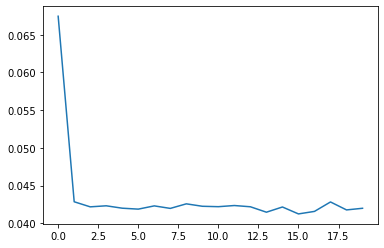

In [63]:
# Plotting of loss value on each epoch 

loss_per_epoch=model_lstm.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [64]:
train_last_batch=train_data_l_scld[-3:]
train_last_batch=train_last_batch.reshape(1,n_input,n_features)
train_last_batch

array([[[0.17857143],
        [0.28571429],
        [0.78571429]]])

In [65]:
pred_1_l=model_lstm.predict(train_last_batch)
print('predicted value - ',pred_1_l)
print('Observed value - ',test_data_l_scld[0])
print('Residual - ',abs((pred_1_l[0]-test_data_l_scld[0])[0]))

predicted value -  [[0.42201287]]
Observed value -  [0.57142857]
Residual -  0.14941570588520592


In [66]:
first_eval_input_batch=train_last_batch
current_eval_input_batch=first_eval_input_batch.reshape(1,n_input,n_features)
pred_vals=[]

for i in range(len(test_data_l)):
    current_pred_val=model_lstm.predict(current_eval_input_batch)[0]
    pred_vals.append(current_pred_val)
    
    current_eval_input_batch=np.append(current_eval_input_batch[:,1:,:],[[current_pred_val]],axis=1)
    
pred_vals

[array([0.42201287], dtype=float32),
 array([0.4257956], dtype=float32),
 array([0.42942864], dtype=float32),
 array([0.40938818], dtype=float32),
 array([0.407808], dtype=float32),
 array([0.40645158], dtype=float32),
 array([0.40504777], dtype=float32),
 array([0.40471804], dtype=float32),
 array([0.4045077], dtype=float32),
 array([0.40438217], dtype=float32),
 array([0.40433556], dtype=float32),
 array([0.40430987], dtype=float32),
 array([0.40429676], dtype=float32),
 array([0.40429085], dtype=float32)]

In [67]:
# Inverse transform of predicted data into original data range 
pred_vals_actual=mnmx_scaler.inverse_transform(pred_vals)
pred_vals_actual

array([[17.81636024],
       [17.92227721],
       [18.02400184],
       [17.46286917],
       [17.41862416],
       [17.38064432],
       [17.34133768],
       [17.33210516],
       [17.32621551],
       [17.32270074],
       [17.32139564],
       [17.32067633],
       [17.32030916],
       [17.32014394]])

In [68]:

Pred_vals_actual=[]
for i in range(pred_vals_actual.shape[0]):
    Pred_vals_actual.append(pred_vals_actual[i][0])
    
Pred_vals_actual

[17.816360235214233,
 17.922277212142944,
 18.024001836776733,
 17.46286916732788,
 17.41862416267395,
 17.38064432144165,
 17.34133768081665,
 17.33210515975952,
 17.326215505599976,
 17.32270073890686,
 17.32139563560486,
 17.32067632675171,
 17.320309162139893,
 17.320143938064575]

In [69]:
# Evaluation of LSTM model
from sklearn.metrics import mean_squared_error

rmse_lstm=mean_squared_error(test_data_l,Pred_vals_actual,squared=False)
rmse_lstm

4.515496516834159

[]

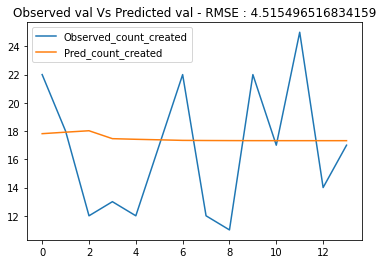

In [70]:
test_pred_data=pd.DataFrame(zip(test_data_l,Pred_vals_actual),columns=['Observed_count_created','Pred_count_created'])
test_pred_data.plot()
plt.title('Observed val Vs Predicted val - RMSE : {}'.format(rmse_lstm))
plt.plot()

In [71]:
import pickle 
pickle.dump(model_arima_fit,open('model_arima_fit.pkl','wb'))
